In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from sklearn import preprocessing
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

# Linear Regression

#Stochastic gradient method

In [ ]:
!pip install prettytable

In [ ]:
boston=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:

train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.335195,0.37710,-1.037833,-0.281546,0.790847,1.816018,0.739433,-0.784571,-0.468875,-0.830584,-2.482659,0.350310,-0.795890,43.1
1,-0.359858,-0.49956,-0.181476,-0.281546,-0.090111,-0.478723,0.515578,0.064575,-0.586592,-0.588929,-0.014333,0.375788,0.757743,17.8
2,-0.389280,-0.49956,0.111678,-0.281546,0.157926,1.038721,0.797202,-0.771917,-0.939745,-0.776211,1.174121,0.443583,-1.023251,23.9
3,1.209167,-0.49956,1.002693,-0.281546,0.363198,0.582916,1.122154,-1.064285,1.767758,1.598040,0.808443,-3.513105,1.163344,17.2
4,0.124317,-0.49956,1.002693,-0.281546,1.398109,-3.840818,0.685274,-1.025135,1.767758,1.598040,0.808443,-0.017858,-0.815539,27.5


In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
#SGD classifier
iter = 100
clf = SGDRegressor(max_iter= iter)
clf.fit(x_train, y_train)
y_pred_SGD = clf.predict(x_test)

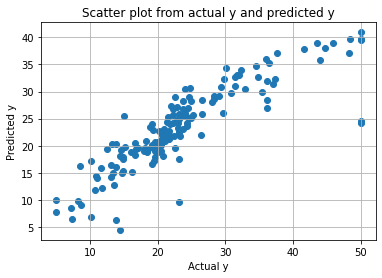

In [ ]:
plt.scatter(y_test,y_pred_SGD)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [ ]:
print('Mean square error', mean_squared_error(y_test, y_pred_SGD))

Mean square error 24.601544052467478


In [ ]:
def CustomSGD(train_data,learning_rate,n_iter,k,divideby):
    
    # Initially we will keep our W and B as 0 as per the Training Data
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    
    cur_iter=1
    while(cur_iter<=n_iter): 

        # We will create a small training data set of size K
        temp=train_data.sample(k)
        
        # We create our X and Y from the above temp dataset
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        
        # We keep our initial gradients as 0
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        
        for i in range(k): # Calculating gradients for point in our K sized dataset
            prediction=np.dot(w,x[i])+b
            w_gradient=w_gradient+(-2)*x[i]*(y[i]-(prediction))
            b_gradient=b_gradient+(-2)*(y[i]-(prediction))
        
        #Updating the weights(W) and Bias(b) with the above calculated Gradients
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        
        # Incrementing the iteration value
        cur_iter=cur_iter+1
        
        #Dividing the learning rate by the specified value
        learning_rate=learning_rate/divideby
        
    return w,b #Returning the weights and Bias

In [ ]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [ ]:
w,b =CustomSGD(train_data,learning_rate=0.001,n_iter=10000,divideby=1,k=10)
y_pred_customsgd_improved=predict(x_test,w,b)

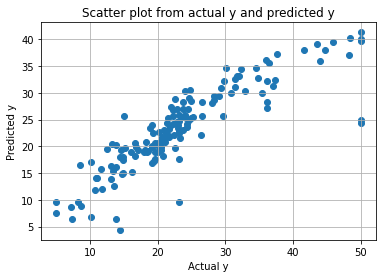

In [ ]:
plt.scatter(y_test,y_pred_customsgd_improved)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [ ]:
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd_improved))

Mean Squared Error : 24.062048063157274


# Randomized coordinate gradient descent

In [ ]:
def costfunction(X,y,theta):
    #Initialisation of useful values 
    m = np.size(y)
    
    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def coordinate_descent(theta,X,y,alpha = .03, num_iters=20):
    '''Coordinate gradient descent for linear regression'''
    #Initialisation of useful values 
    m,n = X.shape
    J_history = []
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards
    
    
    for i in range(num_iters):
        
        for j in range(n):
            #Coordinate descent in vectorized form
            h = X @ theta 
            gradient =  (X[:,j] @ (h-y))
            theta[j] = theta[j] - alpha * gradient
            
            #Saving values for plots
            J_history.append(costfunction(X,y,theta))
            theta_0_hist.append(theta[0,0])
            theta_1_hist.append(theta[1,0])
                       
    return theta ,J_history, theta_0_hist, theta_1_hist

def coordinate_descent_norm(theta,X,y,alpha = .03, num_iters=100):
    '''Coordinate gradient descent for linear regression - for normalized data'''
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X
    J_history = []
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards
    
    
    for i in range(num_iters):
        
        for j in range(n):
            #Coordinate descent in vectorized form
            h = (X[:,0:j] @ theta[0:j]) + (X[:,j+1:] @ theta[j+1:])
            theta[j] =  (X[:,j] @ (y - h))
            
            #Saving values for plots
            J_history.append(costfunction(X,y,theta))
            theta_0_hist.append(theta[0,0])
            theta_1_hist.append(theta[1,0])
                       
    return theta ,J_history, theta_0_hist, theta_1_hist

No handles with labels found to put in legend.
No handles with labels found to put in legend.


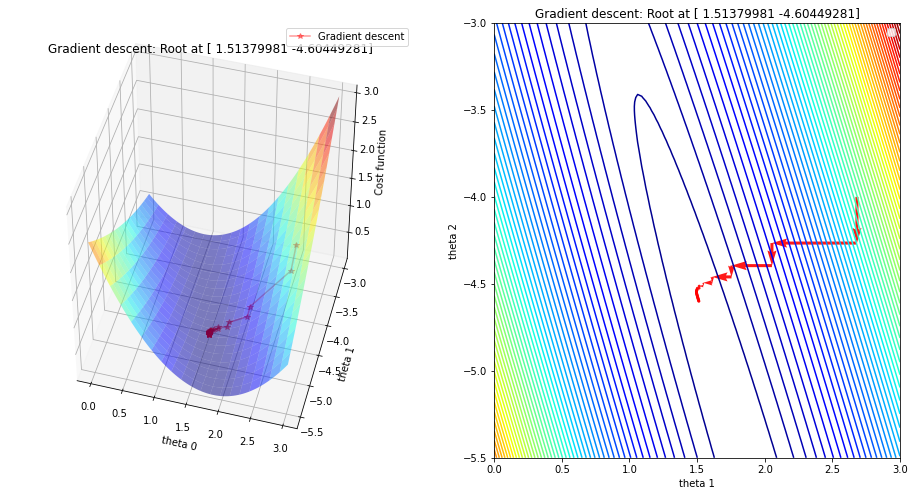

In [ ]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T
initial_theta = np.array([4,-4.]).reshape(-1,1)

#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(0,3,100),np.linspace(-5.5,-3,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


#Computing the gradient descent
theta_result_c,J_history_c, theta_0_c, theta_1_c = coordinate_descent(initial_theta,X,y_noise, alpha = .009) 

#Angles needed for quiver plot
anglesx = np.array(theta_0_c)[1:] - np.array(theta_0_c)[:-1]
anglesy = np.array(theta_1_c)[1:] - np.array(theta_1_c)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0_c,theta_1_c,J_history_c, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta_result_c.ravel()))
ax.view_init(45, -75)
ax.legend()


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0_c[:-1], theta_1_c[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Gradient descent: Root at {}'.format(theta_result_c.ravel()))
ax.legend()

plt.legend()
plt.show()

# Accelerated gradient descent

In [ ]:
def h(a,b,x): #hypothesis function
    return a*x+b

def mse(a,b,x,y): #loss function
    return np.mean((h(a,b,x) - y)**2)

def gradient(a,b,x,y): #mse derivatives
    return np.mean(x*(a*x+b-y), axis=-1), np.mean(a*x+b-y, axis=-1)

def generate_data(nb): #generate data with noise
    x = np.array([])
    y = np.array([])
    for i in range(nb):
        x = np.insert(x, len(x), i)
        y = np.insert(y, len(y), i/2 + np.random.rand()*20)
    return x,y

def shuffle(x,y):
    s = np.arange(len(x))
    np.random.shuffle(s)
    return x[s], y[s]

In [ ]:
def nesterov_gradient_descent(a, b, x, y, lr=0.15, gamma=0.5, epsilon=0.004):
    prev_error = 0
    v_a = v_b = 0
    error = np.array([])
    while True:
        a_tmp = a - gamma*v_a
        b_tmp = b - gamma*v_b
        gradient_a, gradient_b = gradient(a_tmp, b_tmp, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        v_a = lr * gradient_a
        v_b = lr * gradient_b

        a -= v_a
        b -= v_b
    return a, b, error

In [ ]:
x, y = generate_data(1000)
# normalization
x -= np.mean(x)
x /= np.std(x)
y -= np.mean(y)
y /= np.std(y)

In [ ]:
a_0, b_0 = np.random.rand(), np.random.rand()

In [ ]:

a, b, error = nesterov_gradient_descent(a_0, b_0, x, y, lr=1e-1, gamma=0.9)
prediction = h(a,b,x)
print("a =",a,", b =",b)

a = 0.9787588935202194 , b = 0.1306899317166887


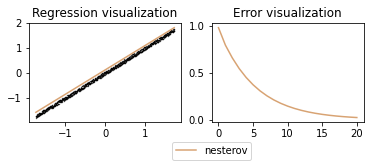

In [ ]:
regression_subplot = plt.subplot(221)
error_subplot = plt.subplot(222)
#Set titles
regression_subplot.set_title("Regression visualization")
error_subplot.set_title("Error visualization")

regression_subplot.plot(x, prediction, color="#D8A373", label="nesterov")
error_subplot.plot(error, color="#D8A373", label="nesterov")
regression_subplot.scatter(x, y, color="black", s=0.1)
plt.legend(bbox_to_anchor=(0, -0.2), loc=9, borderaxespad=0.)
plt.show()

# conjugate gradient method

In [ ]:
import numpy as np
from numpy import linalg as LA


In [ ]:
def is_pos_def(x):
    """check if a matrix is symmetric positive definite"""
    return np.all(np.linalg.eigvals(x) > 0)

In [ ]:
def conjugate_gradient(A, b):
    if (is_pos_def(A) == False) | (A != A.T).any():
        raise ValueError('Matrix A needs to be symmetric positive definite (SPD)')
    r = b 
    k = 0
    x = np.zeros(A.shape[-1])
    while LA.norm(r) > 1e-10 :
        if k == 0:
            p = r
        else: 
            gamma = - (p @ A @ r)/(p @ A @ p)
            p = r + gamma * p
        alpha = (p @ r) / (p @ A @ p)
        x = x + alpha * p
        r = r - alpha * (A @ p)
        k =+ 1
    return x

# Logistic Regression

# Stochastic gradient descent

In [ ]:
from math import exp


In [ ]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

In [ ]:
# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    global lr_error, trackLog
    lr_error = []
    trackLog = []
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            sum_error += error**2
            coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
        lr_error.append(sum_error)
        trackLog.append(epoch)
        #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef

In [ ]:
# Calculate coefficients
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

In [ ]:
l_rate = 0.05
n_epoch = 100
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

[-0.5039123336119578, 0.956912596849407, -1.381352026698702]


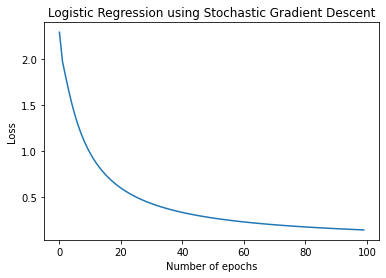

In [ ]:
plt.plot(trackLog, lr_error);
plt.xlabel('Number of epochs');
plt.ylabel('Loss');
plt.title('Logistic Regression using Stochastic Gradient Descent');

# Accelerated gd

In [ ]:
def f(x,w,b):
    '''Sigmoid Function'''
    f = 1/(1+np.exp(-(w*x+b)))
    return f
def mse(x,y,w,b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5*(y[i]-f(x[i],w,b))**2
    return L
def cross_entropy(x,y,w,b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i]*np.log(f(x[i],w,b)))
    return L
def grad_w_mse(x,y,w,b):
    fx = f(x,w,b) 
    dw = (fx - y)*fx*(1-fx)*x
    return dw
def grad_b_mse(x,y,w,b):
    fx = f(x,w,b) 
    db = (fx - y)*fx*(1-fx)
    return db
def grad_w_cross(x,y,w,b):
    fx = f(x,w,b) 
    dw = (- y)*(1-fx)*x
    return dw
def grad_b_cross(x,y,w,b):
    fx = f(x,w,b) 
    db = (- y)*(1-fx)
    return db

In [ ]:
def Nesterov_GD(x,y,epochs,batch_size,loss,eta,lr):
    #global AGD_loss, AGD_log
    #AGD_loss = []
    #AGD_log = []
    w = np.random.randn()
    b = np.random.randn()
    prev_w_look_ahead,prev_b_look_ahead = 0,0
    points = 0
    l_list = []
    w_list = []
    b_list = []
    ep = [i for i in range(epochs+1)]
    dw_look_ahead,db_look_ahead = 0,0
    #First Look Ahead Point
    w_look_ahead = w - lr*prev_w_look_ahead                      #W_look_ahead = w_t - lr*w_update_t-1
    b_look_ahead = b - lr*prev_b_look_ahead                      #B_look_ahead = b_t - lr*b_update_t-1
    for i in range(epochs+1):
        dw_look_ahead,db_look_ahead = 0,0
        for j in range(x.shape[0]):
            #Gradients w.r.t Look Ahead Points
            if (loss == 'mse'):
                dw_look_ahead += grad_w_mse(x[j],y[j],w_look_ahead,b_look_ahead)      
                db_look_ahead += grad_b_mse(x[j],y[j],w_look_ahead,b_look_ahead)
            elif (loss == 'cross_entropy'):
                dw_look_ahead += grad_w_cross(x[j],y[j],w_look_ahead,b_look_ahead)
                db_look_ahead += grad_b_cross(x[j],y[j],w_look_ahead,b_look_ahead)
            points += 1
            if(points % batch_size == 0):
                updated_w = lr*prev_w_look_ahead + eta*dw_look_ahead         #w_update_t = lr*w_update_t-1 + eta*gradient(w_look_ahead)
                updated_b = lr*prev_b_look_ahead + eta*db_look_ahead         #b_update_t = lr*b_update_t-1 + eta*gradient(b_look_ahead)
                w = w - updated_w                                            #W_(t+1) = w_t - w_update_t
                b = b - updated_w                                            #B_(t+1) = b_t - b_update_t
                prev_w_look_ahead = updated_w
                prev_b_look_ahead = updated_b
                #New Look Ahead point after mini batch parameter update
                w_look_ahead = w - lr*prev_w_look_ahead                     
                b_look_ahead = b - lr*prev_b_look_ahead
                dw_look_ahead,db_look_ahead = 0,0
        if (loss == 'mse'):
            print('Loss after {}th epoch = {}\n'.format(i,mse(x,y,w,b)[0]))
            l_list.append(mse(x,y,w,b)[0])
        elif (loss == 'cross_entropy'):
            #print('Loss after {}th epoch = {}\n'.format(i,cross_entropy(x,y,w,b)[0]))
            l_list.append(cross_entropy(x,y,w,b)[0])
        w_list.append(w[0])
        b_list.append(b[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm : Nesterov Accelerated Gradient Decent\nBatch Size = {}\nLearning Rate(Gamma) = {}\nEta = {}\nLoss Function = {}'.format(batch_size,lr,eta,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list

In [ ]:
import scipy.linalg as la
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
np.set_printoptions(precision=3, suppress=True)

In [ ]:
from scipy import optimize as opt

In [ ]:
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

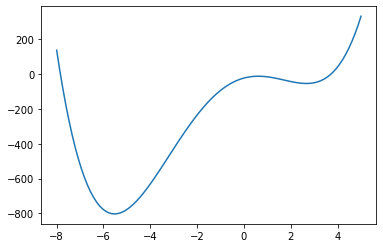

In [ ]:
x = np.linspace(-8, 5, 100)
plt.plot(x, f(x));

In [ ]:
opt.minimize_scalar(f, method='Brent')

     fun: -803.3955308825884
    nfev: 17
     nit: 11
 success: True
       x: -5.528801125219663

In [ ]:
opt.minimize_scalar(f, method='bounded', bounds=[0, 6])

     fun: -54.21003937712762
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 2.668865104039653

In [ ]:
def f(x, offset):
    return -np.sinc(x-offset)

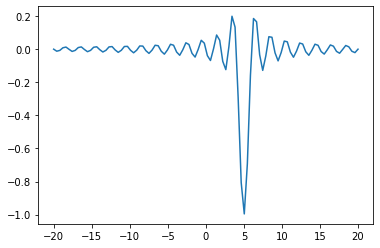

In [ ]:
x = np.linspace(-20, 20, 100)
plt.plot(x, f(x, 5));

In [ ]:
# note how additional function arguments are passed in
sol = opt.minimize_scalar(f, args=(5,))
sol

     fun: -0.049029624014074166
    nfev: 15
     nit: 10
 success: True
       x: -1.4843871263953001

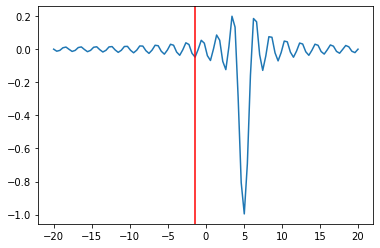

In [ ]:
plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red')
pass

In [ ]:
lower = np.random.uniform(-20, 20, 100)
upper = lower + 1
sols = [opt.minimize_scalar(f, args=(5,), bracket=(l, u)) for (l, u) in zip(lower, upper)]

In [ ]:
idx = np.argmin([sol.fun for sol in sols])
sol = sols[idx]

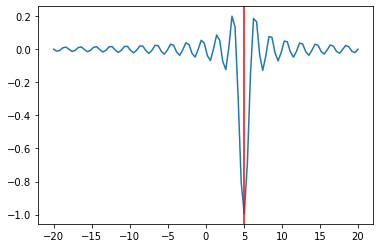

In [ ]:
plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red');

stochastic algorithm

In [ ]:

from scipy.optimize import basinhopping

x0 = 0
sol = basinhopping(f, x0, stepsize=1, minimizer_kwargs={'args': (5,)})
sol

                        fun: -0.12837455352589908
 lowest_optimization_result:       fun: -0.12837455352589908
 hess_inv: array([[0.789]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([2.541])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1965
                        nit: 100
                       njev: 655
                          x: array([2.541])

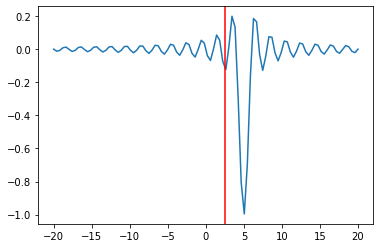

In [ ]:
plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red');

In [ ]:
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

(0.0, 3.0, 0.0, 3.0)

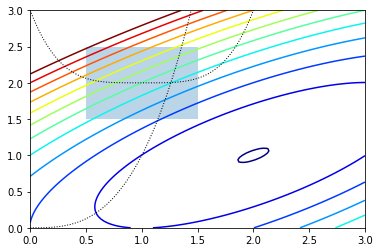

In [ ]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3])